# Computerised Cavendish Balance

## Background

WARNING: This lab is sensitive, do not bump the table or anything reckless of the same sort

## Setup

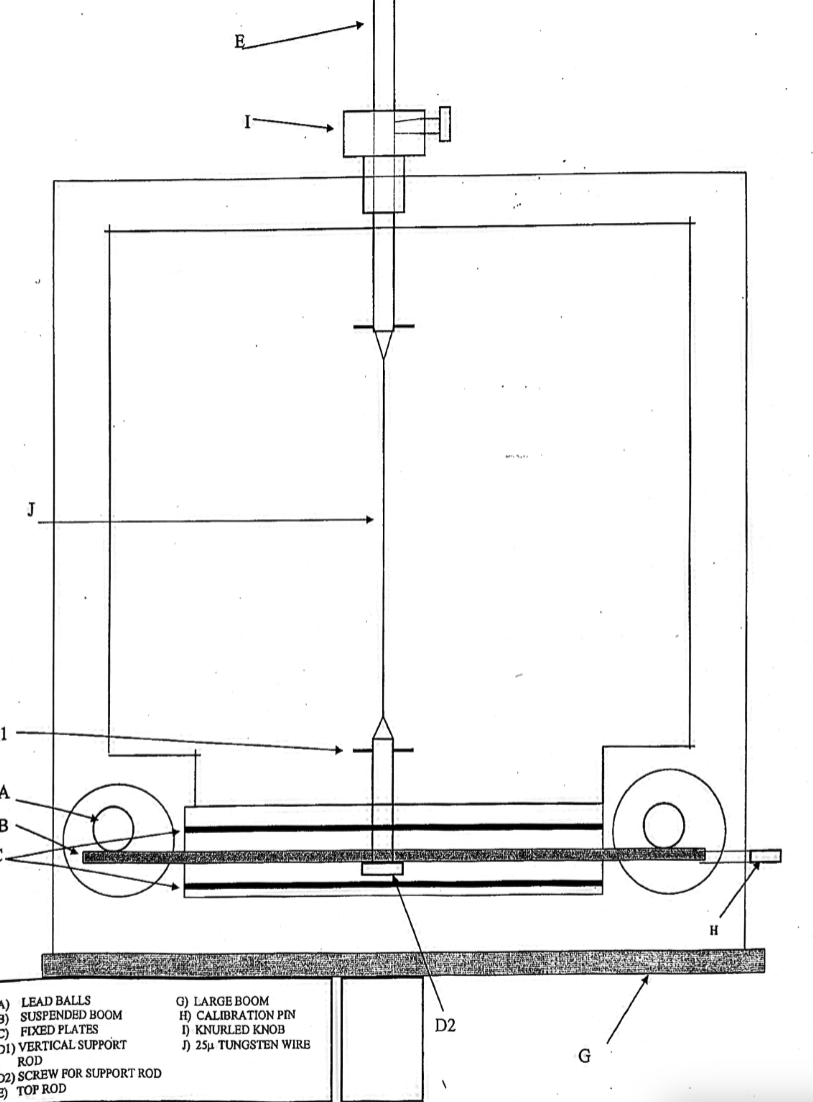

#### Assure that the wire support rod and the boom never touch any part of the unit

1. Place lead ball on edges as shown
2. assure that the suspended boom is as horizontal as possible between the fixed plates (Done by sliding D1 until the boom is level)
3. Raise or lower the boom with E to centre it between the fixed plates
4. Insert the glass and place the large lead balls on the large boom G
5. Position large boom G so that the large balls are perpendicular to the face of the unit

#### Also note that both balls should be removed at the same time

### Zero Adjust Knob

This knob connects to the 6 conductor wire from the cavendish unit. It serves as a way to connect power to the cavendish unit and get the signal from inside the cavendish unit to the outside world. The ten turn pot is an offset to get the signal to read at a convenient level.

The Cavendish has an output of -5 to +5 V as the boom swings from "glass to glass", the ten turn pot provides a 2.5V offset

In an ideal world, the boom could be stopped at exactly the centre of the sensor (this results in a zero reading). Therefore, the fine adjust pot offsets the signal so that when in the "operating area", the output signal is offset to receive $\approx \, 600-1000 \, mV$

## Calibration

1. Connect a voltmetre to the connector box (the part connected to the Cavendish balance) --> To monitor movement of the boom
2. You need a voltage reading for each side of the slot for the end of the boom coming into contact with the calibration pin H
3. For the the computerised cavendish unit, using Kis or something else, set the sample rate to 10/20 samples/sec
4. This results in a voltage swing $\approx 650 \, mV$ for the small gap and $\approx 1000 \, mV$ for the large gap --> Do this for 5-10 complete boom cycles (for both large and small gaps)

The graph should look something like this:

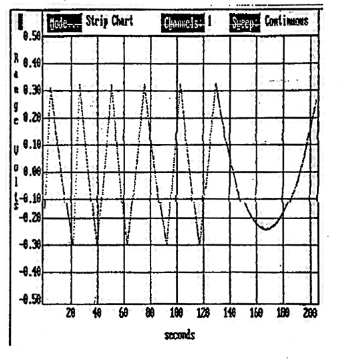

If it's not hitting the pin there will be curved turning points, not sharp turning points, because the support is centred. The boom should rotate through 1-2 degrees. We can therefore approximate the angle in radians.

The distance the boom can move is the gap spacing less than the calibrationn pin diameter.

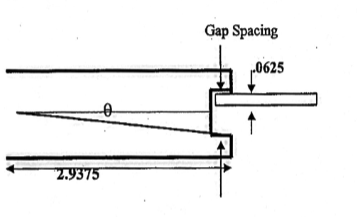

The boom can move 0.123 - 0.062 for the small gap

The boom can move 0.156 - 0.062 for the large gap

If the support is in the centre then tan(x) = x

for the small gap $tan\theta = \frac{.125-.062}{2.938} = 0.0214 \, \text{Radians}$

for the large gap $tan\theta = \frac{.156-.062}{2.938} = 0.32 \, \text{Radians}$

The boom not being centred can be minimised by determining a calibration constant for each side and averaging the values obtained. The boom should also never come to rest against the pin, the result would be the boom turn about a point so that the calibration constant would be in error.

After this calibration, the boom will start to swing, rotate the top knurled knob I to cause the boom to swing near the geometric centre of the unit.

If the boom tends to stop off centre, then rotate the wire so that the boom will move towards the other side. It's possible that the wire is completely twisted which means you will need to rotate the knob more than 360 degrees to swing the boom in the appropriate range.

A voltmetre or computer interface will will determine whether the boom is centred

After the motion of the boom has been appropriately dampened, you can take data:
1. Swing the large perturbing masses so that they just touch the outside glass --> Observe the output from the connector box to see when the boom reaches its limit of rotation
2. You can swing the large masses so that they will again attract the small mass (Be sure to swing the large masses at the turning points to build up the amplitude of rotation
3. Determine the amplitude of the boom on at least 3 successive swings (more is better)
4. After gathering data, place the perturbing masses in the neutral position perpendicular to the face of the cavendish balance
5. Let the boom rotate in free decay in order to determine $\beta \tau$

## Procedure

### Day 1

Settled into the lab, opened up the vernier logging software. The potential without changing anything from the lab was about 536.0 mV

The lab manual said to ignore the complicated setup from the Tel-Atomic manual. We want to measure $\theta_D^{\pm}$ (with the exterior spheres).

The laser should be focused with one $f = 1.00 \, m \, \text{and} \, f = -1.00 \, m$

The resulting effective focal length of these is given by $f_{eff} = \frac{f^2}{d}$ where $d$ is the distance of separation between the two.

#### Switched on the laser

After switching on the laser, the potential started reading out 534-537 and then leveled out towards 536 again

#### We've now increased the computerised cavendish balance to get a potential at ~1000 mV at the largest angle $\theta_D$

We've set this to go for 45 mins, which should be enough time (according to professor Arturo) to let the lead ball to go 0 angle separation

#### LASER LENGTH

Length from the laser to the box: L1 = 108 cm
Length from the box to the mirror: L2 = 110.48 cm
Length from the mirror to the paper: L3 = 157.5 cm

#### Separation distance of focal lenses

d = 38.2

#### Properties of lead ball

Diametre = 5.4 cm
length of large boom = 18 cm

#### Cavendish box

Width of cavendish box: 3.6 cm
Length of cavendish box: 17.6 cm

# Data Processing

In [1]:
%matplotlib inline
import re
from statistics import mean, stdev
import math as m
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import expon
from decimal import Decimal
import scipy.odr.odrpack as odrpack
import scipy.optimize as optimisation
from mpmath import nsum, exp, inf
from scipy.constants import c, hbar

In [38]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

### Small Angle

In [56]:
file1 = open('largeang.txt', 'r')
lines = file1.readlines()
combo = []
#Dummy Variables
t = 0
volt = 0

# Parse the input text file
p = re.compile('([0-9]+)\;([0-9]+)')
for line in lines:
    v = p.match(line)
    t = int(v.group(1))
    volt = int(v.group(2))
        
    combo.append((t, volt))

data1 = sorted(set(combo))

In [73]:
file1_ang = open('second.txt', 'r')
lines = file1_ang.readlines()
combo = []
#Dummy Variables
t = 0
x = 0

# Parse the input text file
p = re.compile('([0.-9.]+)\;([0.-9.]+)')
for line in lines:
    v = p.match(line)
    t = int(v.group(1))
    x = float(v.group(2))
        
    combo.append((t, x))

data1_ang = sorted(set(combo))

### Large Angle

In [58]:
file2 = open('smallang.txt', 'r')
lines = file2.readlines()
combo = []
#Dummy Variables
t = 0
volt = 0

# Parse the input text file
p = re.compile('([0-9]+)\;([0-9]+)')
for line in lines:
    v = p.match(line)
    t = int(v.group(1))
    volt = int(v.group(2))
        
    combo.append((t, volt))

data2 = sorted(set(combo))

In [74]:
file2_ang = open('first.txt', 'r')
lines = file2_ang.readlines()
combo = []
#Dummy Variables
t = 0
x = 0

# Parse the input text file
p = re.compile('([0.-9.]+)\;([0.-9.]+)')
for line in lines:
    v = p.match(line)
    t = int(v.group(1))
    x = float(v.group(2))
        
    combo.append((t, x))

data2_ang = sorted(set(combo))

### Graphs

In [133]:
t1 = [item[0] for item in data1]
y1 = [item[1] for item in data1]
t2 = [item[0] for item in data2]
y2 = [item[1] for item in data2]

T1 = [item[0] for item in data1_ang]
x1 = [item[1] for item in data1_ang]
T2 = [item[0] for item in data2_ang]
x2 = [item[1] for item in data2_ang]

t_d = [(a + b) / 2 for a, b in zip(T1, T2)]
x_d = [b - a for a, b in zip(x1, x2)]

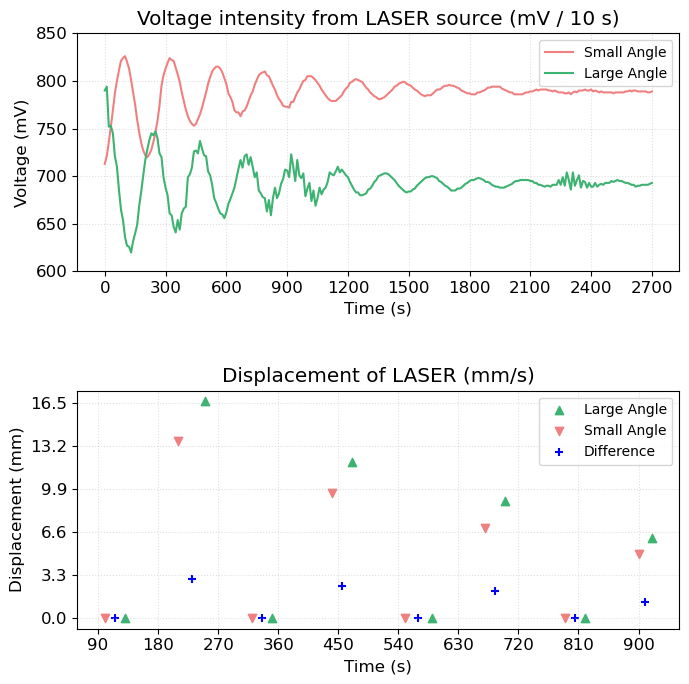

In [134]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))

ax1.plot(t1, y1, label='Small Angle', color='lightcoral')
ax1.plot(t2, y2, label='Large Angle', color='mediumseagreen')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (mV)')
ax1.set_title('Voltage intensity from LASER source (mV / 10 s)')

ax2.scatter(T2, x2, label='Large Angle', color='mediumseagreen', marker='^')
ax2.scatter(T1, x1, label='Small Angle', color='lightcoral', marker='v')
ax2.scatter(t_d, x_d, label='Difference', color='blue', marker='+')

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Displacement (mm)')
ax2.set_title('Displacement of LASER (mm/s)')

fig.tight_layout()
ax1.grid(alpha=.4,linestyle=':')
ax2.grid(alpha=.4,linestyle=':')
ax1.legend(fontsize=10)
ax2.legend(fontsize=10)

#Changing axes numbers
ax1.set_xticks(np.linspace(0, 2700, 10))  # Set 11 ticks evenly spaced from 0 to 10
ax1.set_yticks(np.linspace(600, 850, 6))  # Set 11 ticks evenly spaced from -1 to 1

ax2.set_xticks(np.linspace(90, 900, 10))  # Set 11 ticks evenly spaced from 0 to 10
ax2.set_yticks(np.linspace(0, 16.5, 6))  # Set 11 ticks evenly spaced from -1 to 1

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust the spacing as needed

#ax1.savefig('data.eps', format='eps') Uncomment when ready for paper writiing
#ax2.savefig('displ.eps', format='eps') Uncomment when ready for paper writiing
plt.show()

### Data Processing

In [340]:
thet = ( x_d[1] + x_d[3] + x_d[5]) / 3

In [581]:
# Variables
L = (108 + 110.48 + 157.5) / 100   # Length of the LASER's path ( ±0.5 cm )
d = 38.2 / 100                   # Separation of focal lenses ( ±0.5 cm )

r_bl = 5.4 / 200             # Radius of large lead ball ( ±0.5 cm )
B = 18 / 100                     # Length of large boom ( ±0.5 cm )

l_b = 17.6 / 100                 # Length of cavendish box ( ±0.5 cm )
w_b = 3.6 / 100                  # Width of cavendish box ( ±0.5 cm )

ang1 = 0.01205445905175739 * np.pi / (180 * 2) # PLACEHOLDER  # Angle between gravitational forces
ang = np.arctan( (thet/200) * np.pi / (180 * 2) )

m_h = 0.34/1000            # Mass of small hole - aluminium ( ±0.00005 kg)
m_her = 0.00005

In [582]:
sum_diff = np.sum(np.diff(t_d))
T_avg = 2 * (sum_diff / (len(t_d) - 1))
print("There is negligible error in the average period: ", np.sum(np.diff(t_d) - T_avg/2) / (len(t_d) - 1))
print(f"Average period for both timed sets: {T_avg} secs")

There is negligible error in the average period:  2.0301221021717147e-15
Average period for both timed sets: 227.14285714285714 secs


In [583]:
# Calculated Values

# Mass of inner beam
m_b = (l_b/100 * w_b/100 * 1/100) * 2710  # (kg)
m_berr = np.sqrt( (w_b * 2710 * 0.0005 / 10000)**2 + (l_b * 2710 * 0.0005 / 10000)**2 )

# Effective Focal lens
f_eff = 1 / d              # Effective focal lense, followed by its error (m^-1)
f_effer = np.sqrt( (1 / d**2) * 0.0005**2)

# Determining R
R = w_b / 2 + r_bl         # Separation between centres of small and large spheres (m)
R_err = np.sqrt(0.0005**2/4 + 0.0005**2)

# Determinig mass
m_bl = 0.935                  # mass of large lead ball (kg)
m_bler = np.sqrt(0.0036)       # error of the mass of the large lead ball

m_sl = 0.277                  # mass of small lead ball (kg)
m_sler = np.sqrt(0.0016)       # error of the mass of the small lead ball

# Correction for large sphere attraction to the distant small sphere
f_d = R**3 / ( R**2 + (2*d)**2 )**(3/2)
dfd_dR = 3 * R**2 / ( R**2 + (2 * d)**2)**(5/2)
dfd_dd = -12 * R**2 / ( R**2 + (2 * d)**2)**(5/2)
f_derr = np.sqrt( ( dfd_dR * R_err )**2 + ( dfd_dd * 0.0005 )**2 )

# Correction for the gravitational torque exerted on the beam
dp = d / R
dp_err = np.sqrt( (0.0005 / R)**2 + ( (d * R_err)**2 / R**4 ) )
lp = l_b / (2 * R)
lp_err = np.sqrt( (0.0005 / (2*R))**2 + ( (d * R_err)**2 / (4 * R**4) ) )

f_b = (1 / (dp * 2 * lp)) * ( ( (1 + dp * (lp + dp)) / np.sqrt(1 + (lp + dp)**2) ) - ( (1 - dp * (lp - dp)) / np.sqrt(1 + (lp - dp)**2) ) )

dfb_ddp = (1 / (dp * 2 * lp)) * ( ( ((lp + dp) * np.sqrt(1 + (lp + dp)**2)) / ( 1 + (lp + dp)**2)**(3/2)) - ( ((lp - dp) * np.sqrt(1 + (lp - dp)**2)) / ( 1 + (lp - dp)**2)**(3/2)) )
dfb_dlp = (1 / (dp * 2 * lp)) * ( ( ( np.sqrt(1 + (lp + dp)**2)) / ( 1 + (lp + dp)**2)**(3/2)) - ( ( np.sqrt(1 + (lp - dp)**2)) / ( 1 + (lp - dp)**2)**(3/2)) )

f_berr = np.sqrt( (dfb_ddp * dp_err)**2 + (dfb_dlp * lp_err)**2)

# Moment of intertia
Is = 2 * ( m_sl * d**2 + 2 * m_sl * (w_b / 2)**2 / 5 )
Is_err = np.sqrt( ( (2 * d**2 + (8 * w_b**2 / (4*5))) * m_sler )**2 + ( 4 * m_sler * d * 0.0005 )**2 + ( 8 * m_sler * w_b * 0.0005 / 5 )**2)
Ib = m_b * (l_b**2 + w_b**2) / 12
Ib_err = np.sqrt( ( (l_b**2 + w_b**2) * m_berr / 12 )**2 + ( 2 * m_b * w_b * 0.0005 / 12 )**2 + ( 2 * m_b * w_b * 0.0005 / 12 )**2 )

I = Is + Ib
I_err = np.sqrt( Is_err**2 + Ib_err**2 )

k = ( (4 * np.pi**2) / T_avg**2 ) * I
k_err = np.sqrt( (4 * np.pi**2 * I_err / T_avg**2)**2 )



With all of these values we can finally calculate the value for G with this equation:
$
G = \frac{K \theta_D R^2}{2M ((m-m_h)(1-f_d) + m_b f_b) d}
$

In [584]:
G = ( k * ang * R**2 ) / ( 2 * m_bl * ( (m_sl - m_h) * (1 - f_d) + m_b * f_b) * d)

dGdk = ( ang * R**2 ) / ( 2 * m_bl * ( (m_sl - m_h) * (1 - f_d) + m_b * f_b) * d)
dGdang = ( k * R**2 ) / ( 2 * m_bl * ( (m_sl - m_h) * (1 - f_d) + m_b * f_b) * d)
dGdR = ( 2 * k * ang * R) / ( 2 * m_bl * ( (m_sl - m_h) * (1 - f_d) + m_b * f_b) * d)
dGdmbl = ( - k * ang * R**2 ) / ( 2 * m_bl**2 * ( (m_sl - m_h) * (1 - f_d) + m_b * f_b) * d)
dGdmsl = ( k * ang * R**2 * (1 - f_d) ) / ( 2 * m_bl * ( (m_sl - m_h) * (1 - f_d) + m_b * f_b)**2 * d)
dGdmh = ( - k * ang * R**2 * (1 - f_d) ) / ( 2 * m_bl * ( (m_sl - m_h) * (1 - f_d) + m_b * f_b)**2 * d)
dGdfd = ( k * ang * R**2 * (m_sl - m_h) ) / ( 2 * m_bl * ( (m_sl - m_h) * (1 - f_d) + m_b * f_b)**2 * d)
dGdmb = ( k * ang * R**2 * f_b ) / ( 2 * m_bl * ( (m_sl - m_h) * (1 - f_d) + m_b * f_b)**2 * d)
dGdfb = ( k * ang * R**2 * m_b ) / ( 2 * m_bl * ( (m_sl - m_h) * (1 - f_d) + m_b * f_b)**2 * d)
dGdd = ( k * ang * R**2 ) / ( 2 * m_bl * ( (m_sl - m_h) * (1 - f_d) + m_b * f_b) * d**2)

G_err = np.sqrt( 
                (dGdk * k_err)**2 + (dGdang * 0.0001 * np.pi / 180)**2 + (dGdR * R_err)**2 + (dGdmbl * m_bler)**2 + 
                (dGdmsl * m_sler)**2 + (dGdmh * m_her)**2 + (dGdfd * f_derr)**2 + (dGdmb * m_berr)**2 + 
                (dGdfb * f_berr)**2 + (dGdd * 0.0005)**2 
)                

In [585]:
print(G, G_err)

6.921547549454603e-11 1.497145526783444e-11
